# Credit Card Fraud Detection

## Executive Summary:
### In this project, we will analyze the dataset which contains 492 fradulent transactions out of 284,807 transactions. The dataset is in the form of a csv file which was obtained from kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud) and contains transactions made by credit cards in September 2013 by European cardholders. Our objective of this project is to analyze the dataset and mould it accordingly by normalizing, cleaning, and resampling so that our machine learning models can learn better from the dataset and predict to a higher accuracy. Since there are 28 variables which are the result of a principle component analysis (PCA) transformation and the information of the variables was not given, we will drop the variables which have similar distributions. Our next step is to deal with the unbalanced issue. We will use the synthetic minority over-sampling technique (SMOTE) to resample the dataset to make the numbers of frauds and normal transactions even. The last step is to compare the machine learning models and we found that the K-Nearest Neighbour model returned the highest accuracy and F1 score and also had the least false values in the confusion matrix.

#### # Importing packages

In [656]:
import pandas as pd #..............................................................................for processing data
import numpy as np #...............................................................................for dealing with arrays
import matplotlib.pyplot as plt  #.................................................................for visualization
from matplotlib.pyplot import rcParams #...........................................................for adjusting figure size                                                         
import matplotlib.gridspec as gridspec #...........................................................for customizing figure layout
from termcolor import colored as cl #..............................................................for customizing font color
%pylab inline 
import seaborn as sns #............................................................................for data visualization
from sklearn.preprocessing import StandardScaler #.................................................for normalizing
from sklearn.model_selection import train_test_split, cross_val_score #............................for data splitting
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve #....................performance metrics
import itertools #.................................................................................advanced tools
from sklearn import tree, linear_model, neighbors, ensemble, discriminant_analysis #...............ML algorithms
from sklearn.neighbors import KNeighborsClassifier #...............................................ML algorithms
from imblearn.over_sampling import SMOTE #.........................................................for resampling
import warnings #..................................................................................for removing warning signs
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### # Importing Data

In [657]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Variable Description:
##### Time: The seconds elapsed between each transaction and the first transaction in the dataset.
##### V1 to V28: Principle components obtained with PCA
##### Amount: Transaction amount in Euro.
##### Class: The actual classfication classes (0 = Normal transaction, 1 = Fraud).

### # Checking for missing values

In [658]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### We can see that there are no missing values in the data.

### # Data processing and EDA

In [659]:
cases = len(df)
nonfraudulent_count = len(df[df.Class == 0])
fraudulent_count = len(df[df.Class == 1])
fraudulent_percentage = round(fraudulent_count/nonfraudulent_count*100, 3)

print(cl('CASE COUNT', attrs = ['bold'], color = 'grey'))
print(cl('----------------------------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraudulent cases are {}'.format(nonfraudulent_count), attrs = ['bold']))
print(cl('Number of fraudulent cases are {}'.format(fraudulent_count), attrs = ['bold']))
print(cl('Percentage of fraudulent cases is {}'.format(fraudulent_percentage), attrs = ['bold']))
print(cl('----------------------------------------------------------------', attrs = ['bold']))

CASE COUNT
----------------------------------------------------------------
Total number of cases are 284807
Number of Non-fraudulent cases are 284315
Number of fraudulent cases are 492
Percentage of fraudulent cases is 0.173
----------------------------------------------------------------


### Graphical view:

Text(0, 0.5, 'Class (0 = Genuine Transactions, 1 = Fradulent Transactions)')

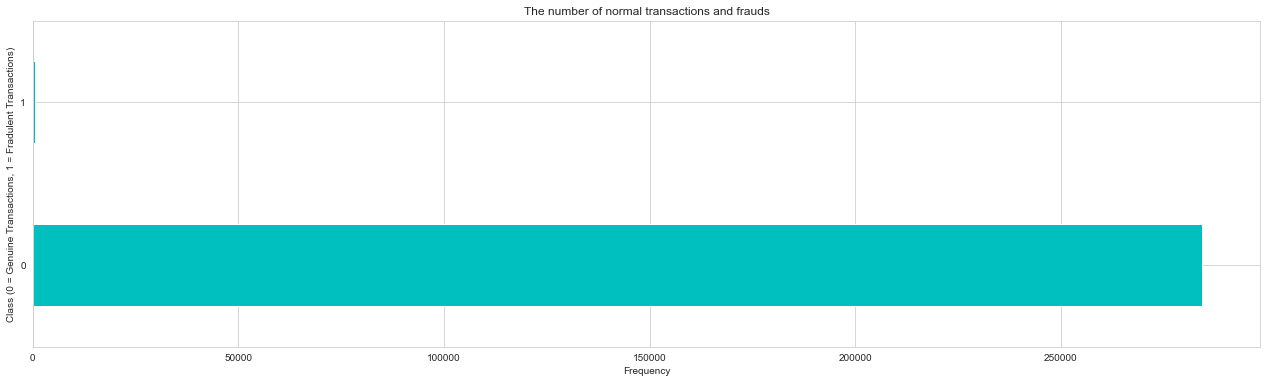

In [660]:
rcParams['figure.figsize']= 22,6
sns.set_style('whitegrid')
pd.value_counts(df['Class'], sort=True).plot(kind='barh', color = 'c')
plt.title('The number of normal transactions and frauds')
plt.xlabel('Frequency')
plt.ylabel('Class (0 = Genuine Transactions, 1 = Fradulent Transactions)')

#### Since the data contains only 0.173% of fradulent transactions, it is highly imbalanced for modelling purpose and needs to be handled carefully.

### # Statistical view of the 'Amount' data of both fraudulent and non-fraudulent transactions. 

In [661]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]
print(cl('GENUINE TRANSACTIONS AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())

print(cl('FRAUDULENT TRANSACTIONS AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())

GENUINE TRANSACTIONS AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
FRAUDULENT TRANSACTIONS AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


### Graphical view:

Text(0, 0.5, 'Euro')

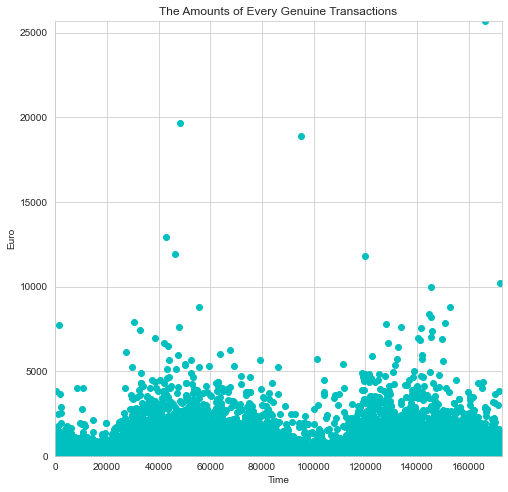

In [662]:
rcParams['figure.figsize']= 8,8
plt.scatter(df['Time'][df.Class==0], df['Amount'][df.Class==0], color = 'c')
plt.margins(0)
plt.title('The Amounts of Every Genuine Transactions')
plt.xlabel('Time')
plt.ylabel('Euro')

Text(0, 0.5, 'Euro')

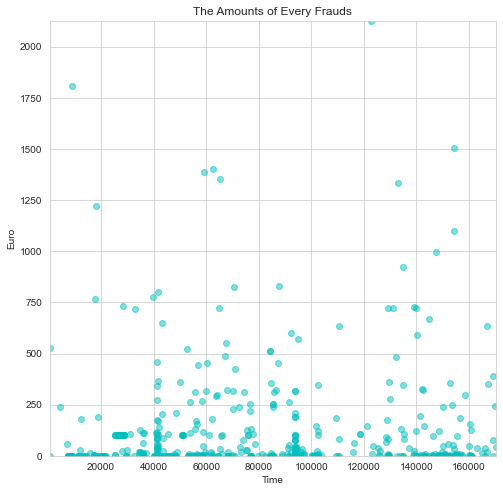

In [663]:
plt.scatter(df['Time'][df.Class==1], df['Amount'][df.Class==1], color='c', alpha=0.5)
plt.margins(0)
plt.title('The Amounts of Every Frauds')
plt.xlabel('Time')
plt.ylabel('Euro')

#### It is observed that for 'normal transactions', the greatest amount is just above 25000 euro and for 'fraudulent transactions', the greatest amount is just above 2000 euro.

### It is seen from 'Amount's' statistical view that it is varying enormously when compared to the rest of the variables and needs to be normalized to reduce it's wide range of values.

In [664]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
print(cl(df['Amount'], attrs = ['bold'], color = 'grey'))

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64


### Graphical view of the distribution of V1 to V28 columns of the data:

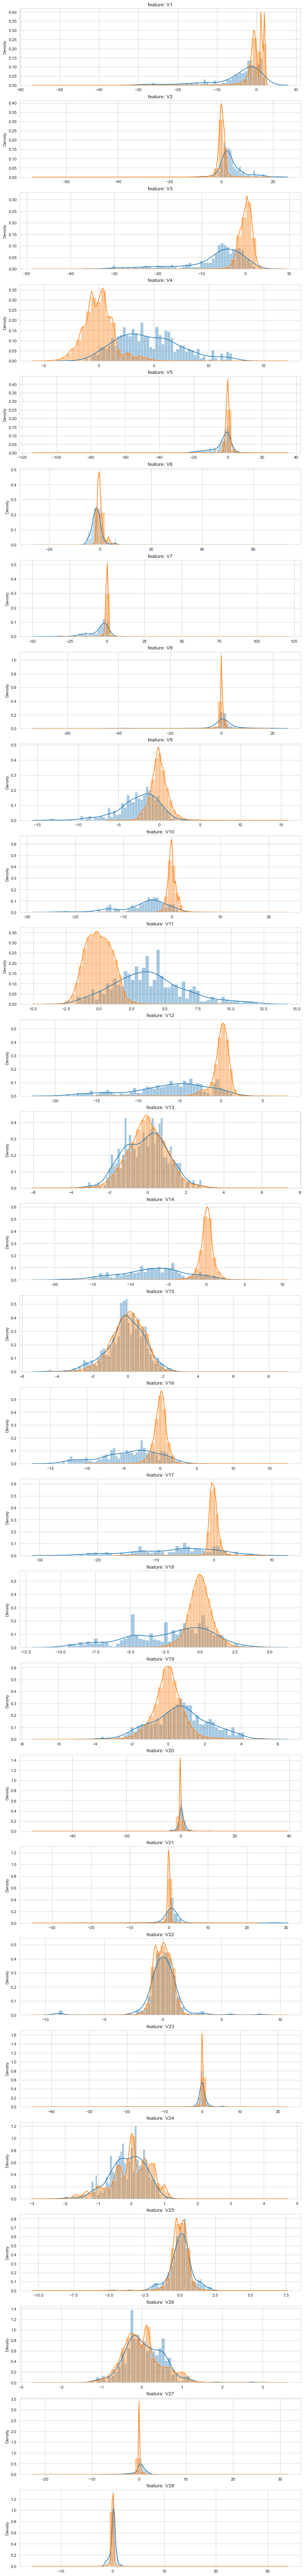

In [665]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[df.iloc[:, 1:29].columns]):
   ax = plt.subplot(gs[i])
   sns.distplot(df[cn][df.Class == 1], bins=50)
   sns.distplot(df[cn][df.Class == 0], bins=50)
   ax.set_xlabel('')
   ax.set_title('feature: ' + str(cn))
plt.show()

### We will drop some variables which distribute similarly for cleaning purpose.

In [666]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

### We will also drop the 'time' variable because it does not serve a usefull purpose in modelling.

In [667]:
df = df.drop(['Time'], axis=1)

In [668]:
df

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,-0.313249,0


### Resampling

#### The goal here is to create a dataset that has equal number of fraudulent and non-fraudulent transactions.

#### Since the output of the data is whether the transaction is fraudulent or not which is represented by the 'class' column, we take 'y' to be equal to the class column values.
#### All the other values which affect the output is equal to 'X'.

In [669]:
X = df.drop('Class', axis=1)
y = df.Class

### We are resampling using the Synthetic Minority Oversampling Technique or SMOTE. This approach involves oversampling of the minority class which in this case is the 'fradulent transactions'.
#### Previously, we had 284315 normal transactions, and 492 fraud transactions. SMOTE approach will duplicate examples in minority class, so 492 fraudulent transactions will become around 284000 fraudulent transactions. Now we have a total of 568000 transactions (284k normal + 284k fraudulent)

In [670]:
X_resample, y_resample = SMOTE().fit_resample(X, y)
print ('The number of transactions after resampling : ' + str(len(X_resample)))
print ('Is the number of fraudulent transaction is equal to the number of normal tansactions? ' + str(sum(y_resample == 0) == sum(y_resample == 1)))

The number of transactions after resampling : 568630
Is the number of fraudulent transaction is equal to the number of normal tansactions? True


#### We have a balanced data set now.

### # Data Splitting

#### Using the defined variables, we will split the data into a training set and testing set which is further used for modeling and evaluating.

#### We will split the data using the train_test_split algorithm available in python.

In [671]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.2, random_state = 0)

In [672]:
print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :               V1        V2        V3        V4        V5        V6       V7  \
46700 -0.619083  0.275613  3.133503  3.110009 -0.346146  0.924511 -0.10232   

             V9       V10       V11       V12      V14       V16      V17  \
46700  0.166613  0.252196 -0.889905  0.240467 -1.05597 -1.225048  1.02248   

            V18       V19       V21    Amount  
46700 -1.047563  0.371379 -0.143245 -0.204661  
X_test samples :                 V1        V2         V3        V4         V5        V6  \
484657 -15.040463  7.351489 -16.179205  9.160683 -13.326482 -2.955787   

               V7        V9        V10       V11        V12       V14  \
484657 -16.057929 -7.914759 -12.993733  4.862647 -11.115917 -8.658362   

              V16        V17       V18       V19       V21    Amount  
484657 -10.668164 -21.053442 -8.403418  3.206441  3.136614  0.043795  
y_train samples :  46700     0
404922    1
263112    0
17998     0
349983    1
206866    0
138783    0
413340    1
2510

### We will apply 3 machine learning algorithms for classification.
#### Logistic Regression
#### Random Forrest Tree
#### K-Nearest Neighbour

### After this we are going to evaluate our built models using the evaluation metrics provided by the scikit-learn package. This will provide the best model for our case.
### We are going to use 3 evaluation metrics:- Accuracy Score, F1 Score, and Confusion Matrix
#### Accuracy score = No.of correct predictions / Total no.of predictions
#### F1 score = 2 * ( (precision * recall) / (precision + recall) )

# -------------------------------------------------------------------------

### [1] Logistic Regression:
#### Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. 
#### To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes. Say, if predicted_value ≥ 0.5, then classify output as fraud or else non-fraud.

In [673]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y = lr.predict(X_test)

In [674]:
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_y)), attrs = ['bold']))

Accuracy score of the Logistic Regression model is 0.9364525262472961


In [675]:
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_y)), attrs = ['bold']))

F1 score of the Logistic Regression model is 0.9342252559726961


In [676]:
accVec = []
f1sVec = []
accVec.append(accuracy_score(y_test, lr_y))
f1sVec.append(f1_score(y_test, lr_y))

In [677]:
# Confusion Matrix

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Oranges):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

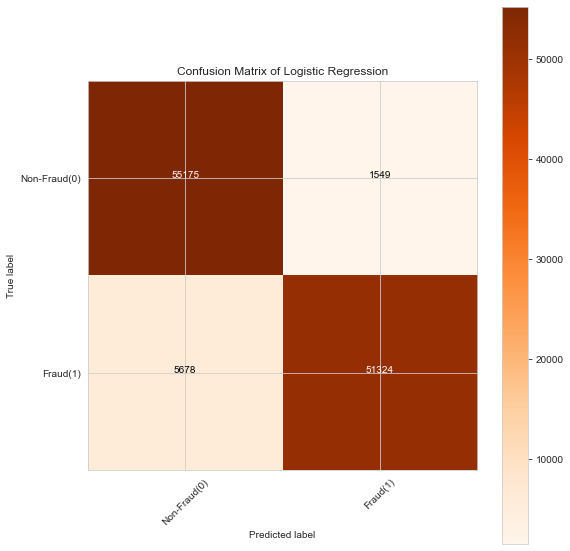

In [678]:
lr_matrix = confusion_matrix(y_test, lr_y, labels = [0, 1])

lr_cm_plot = plot_confusion_matrix(lr_matrix, classes = ['Non-Fraud(0)','Fraud(1)'], normalize = False, title = 'Logistic Regression')
plt.show()

### [2] Random Forest Tree:
#### Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.
#### It follows the 'Wisdom of crowd approach'. It believes that a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. 

In [679]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_y = rf.predict(X_test)

In [680]:
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_y)), attrs = ['bold'], color = 'red'))

Accuracy score of the Random Forest Tree model is 0.9364349401192339


In [681]:
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_y)), attrs = ['bold'],  color = 'red'))

F1 score of the Random Forest Tree model is 0.9327441038284411


In [682]:
accVec.append(accuracy_score(y_test, rf_y))
f1sVec.append(f1_score(y_test, rf_y))

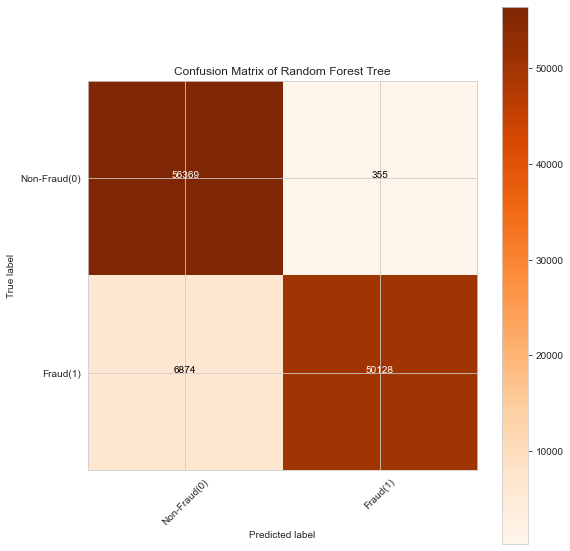

In [683]:
rf_matrix = confusion_matrix(y_test, rf_y, labels = [0, 1])

rf_cm_plot = plot_confusion_matrix(rf_matrix, classes = ['Non-Fraud(0)','Fraud(1)'], normalize = False, title = 'Random Forest Tree')
plt.show()

### [3] The k-nearest neighbors (KNN): 
#### It is a supervised machine learning algorithm. It is based on the assumption that similar things exist in close proximity
#### For each example in the data, it calculates the distance between the query example and the current example from the data.
#### Sort the ordered collection of distances and indices from smallest to largest and then place a label on each of the group.

In [684]:
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_y = knn.predict(X_test)

In [685]:
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_y)), attrs = ['bold'], color = 'green'))

Accuracy score of the KNN model is 0.9989800045723933


In [686]:
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_y)), attrs = ['bold'], color = 'green'))

F1 score of the KNN model is 0.9989835261128637


In [687]:
accVec.append(accuracy_score(y_test, knn_y))
f1sVec.append(f1_score(y_test, knn_y))

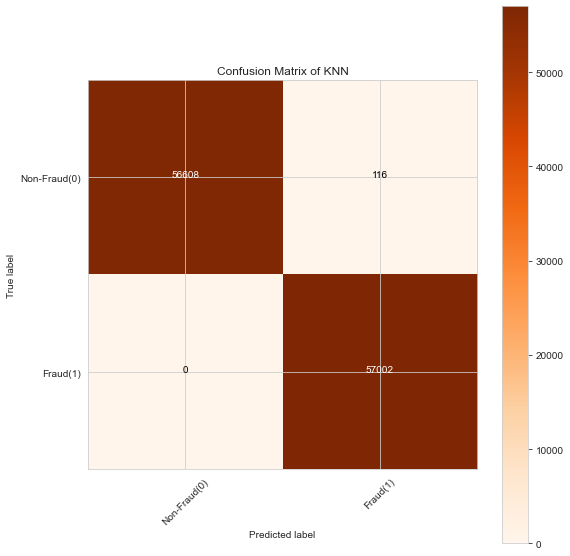

In [688]:
knn_matrix = confusion_matrix(y_test, knn_y, labels = [0, 1])

knn_cm_plot = plot_confusion_matrix(knn_matrix, classes = ['Non-Fraud(0)','Fraud(1)'], normalize = False, title = 'KNN')
plt.show()

### ----------------------------------------------------------------------------------------------------------------------

### Performance Comparison of three ML models:

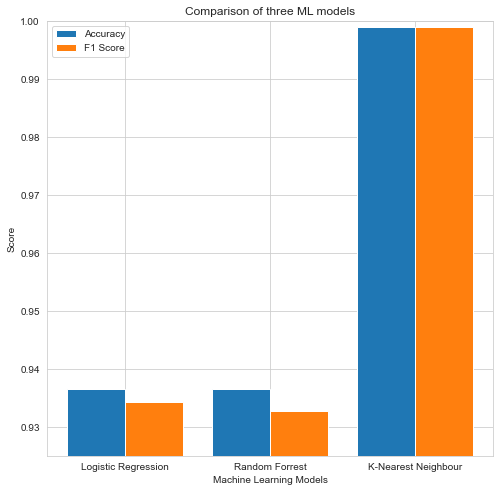

In [689]:
X = ['Logistic Regression','Random Forrest','K-Nearest Neighbour']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, accVec, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, f1sVec, 0.4, label = 'F1 Score')
  
plt.xticks(X_axis, X)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Comparison of three ML models")
plt.ylim(0.925, 1)
plt.legend()
plt.show()

### Conclusion:
#### - We can see that the KNN model has the highest accuracy out of the three models and beats the other two models by significant margin. 
#### - On the other hand it is also the model that took the longest time to execute, so it cannot be implemented in cases where fast decision is required.
#### - Logistic Regression and Random Forrest tree come in 2nd and 3rd place respectively.

## References:

#### [1] Credit Card Fraud Detection Database, Anonymized credit card transactions labeled as fraudulent or genuine, https://www.kaggle.com/mlg-ulb/creditcardfraud
#### [2] Principal Component Analysis, Wikipedia Page, https://en.wikipedia.org/wiki/Principal_component_analysis
#### [3] RandomForrestClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#### [4] K-Nearest Neighbour, https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
#### [5] Logistic Regression, https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
#### [6] SMOTE, https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/